<a href="https://colab.research.google.com/github/data04190/NC7_project_ex/blob/main/bioid_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://www.bioid.com/uploads/BioID-FaceDatabase-V1.2.zip
!unzip BioID-FaceDatabase-V1.2.zip

--2023-09-28 16:00:47--  https://www.bioid.com/uploads/BioID-FaceDatabase-V1.2.zip
Resolving www.bioid.com (www.bioid.com)... 137.117.224.218
Connecting to www.bioid.com (www.bioid.com)|137.117.224.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125224925 (119M) [application/x-zip-compressed]
Saving to: ‘BioID-FaceDatabase-V1.2.zip’

BioID-FaceDatabase- 100%[===================>] 119.42M  8.66MB/s    in 22s     

2023-09-28 16:01:10 (5.48 MB/s) - ‘BioID-FaceDatabase-V1.2.zip’ saved [125224925/125224925]

Archive:  BioID-FaceDatabase-V1.2.zip
 extracting: BioID_1517.eye          
  inflating: BioID_0000.pgm          
  inflating: BioID_0001.eye          
  inflating: BioID_0001.pgm          
 extracting: BioID_0002.eye          
  inflating: BioID_0002.pgm          
 extracting: BioID_0003.eye          
  inflating: BioID_0003.pgm          
 extracting: BioID_0004.eye          
  inflating: BioID_0004.pgm          
 extracting: BioID_0005.eye          
  in

In [11]:
import os

# 현재 작업 디렉터리에 있는 파일 및 디렉터리 목록 확인
current_directory_files = os.listdir("/content/")

# 현재 디렉터리의 파일 및 하위 디렉터리 목록 출력하기
for file_name in current_directory_files[:10]:
    print(file_name)

.config
BioID_0839.eye
BioID_0058.eye
BioID_1085.eye
BioID_0859.pgm
BioID_0470.eye
BioID_1231.pgm
BioID_0233.pgm
BioID_1453.eye
BioID_0264.pgm


In [3]:
!pip install opencv-python
import cv2
import matplotlib.pyplot as plt

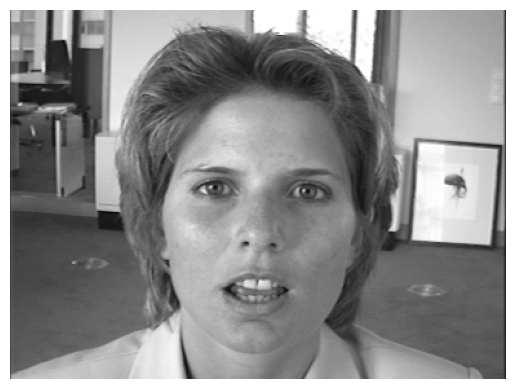

In [27]:
# 이미지 읽기
img_path = 'BioID_1519.pgm'
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # .pgm 파일을 grayscale로 읽어들임

# 이미지 표시
plt.imshow(img, cmap='gray')  # .pgm은 흑백 이미지이므로 cmap='gray'로 설정
plt.axis('off')  # 축 표시 제거
plt.show()

In [29]:
#동공 추적
def detect_eyes_and_pupil(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            eye_roi = roi_gray[ey:ey+eh, ex:ex+ew]
            circles = cv2.HoughCircles(eye_roi, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
            if circles is not None:
                circles = circles[0].astype('int')
                for (cx, cy, r) in circles:
                    cv2.circle(eye_roi, (cx, cy), r, (255, 255, 255), 2)

            cv2.rectangle(img, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

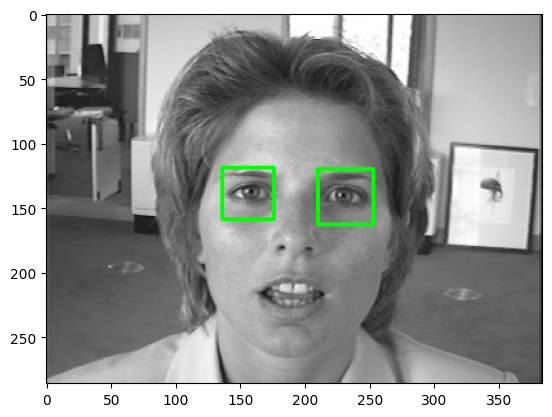

In [30]:
# 이미지로 테스트
detect_eyes_and_pupil('BioID_1519.pgm')